#### Dataset source: https://www.kaggle.com/c/titanic/data

### Read train and test datasets

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

train_dataframe = pd.read_csv('train.csv')
test_dataframe = pd.read_csv('test.csv')

In [2]:
train_df = train_dataframe.copy()
test_df = test_dataframe.copy()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Cleaning data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df = train_df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

In [8]:
train_df = train_df.dropna(subset=['Embarked'])

In [9]:
train_df.shape

(889, 8)

### Preprocessing

In [10]:
# Define numeric and categorical features
num_features = ['Age', 'Fare']
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
# Preprocessing pipeline for numeric features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler()) 
])

# Preprocessing pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# Preprocessing for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

### EDA

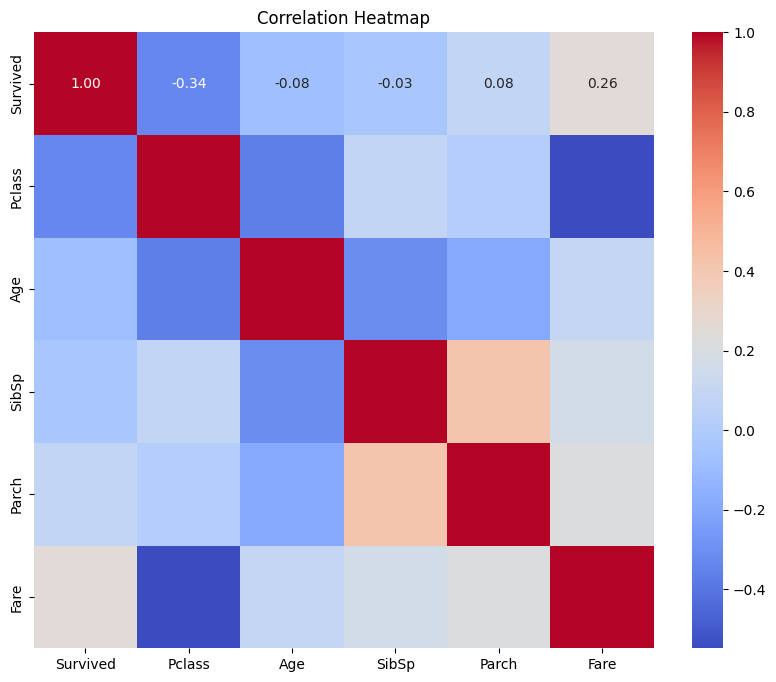

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.select_dtypes(include=[int,float]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Distribution of Target variable
survivors = train_df['Survived'].value_counts()#normalize=True)
survivors

Survived
0    549
1    340
Name: count, dtype: int64

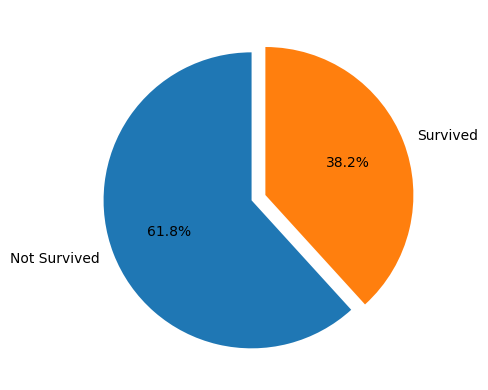

In [13]:
plt.figure(figsize=(6,4))
plt.pie(survivors, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0))
plt.tight_layout()
plt.show()

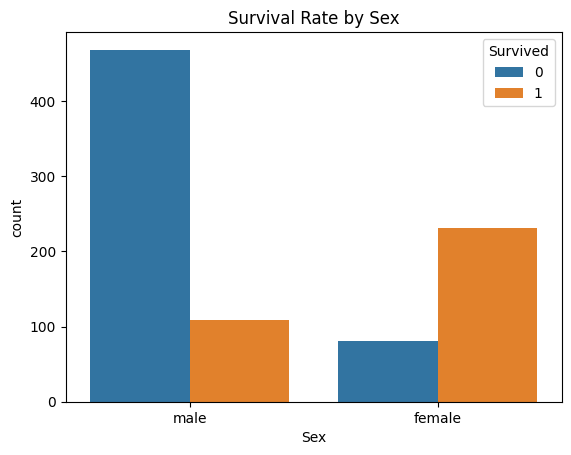

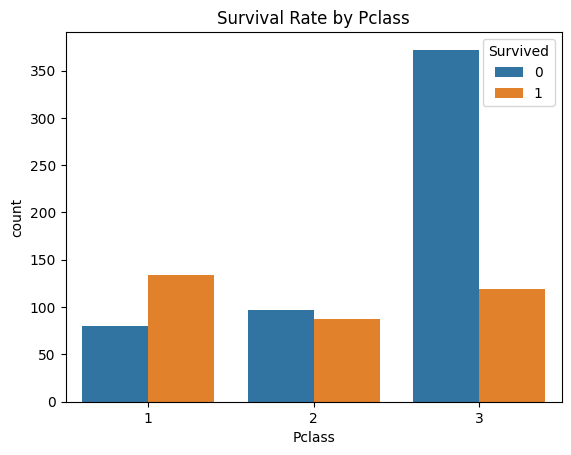

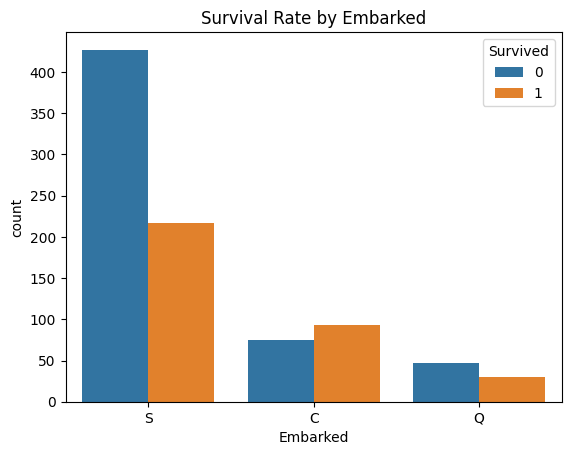

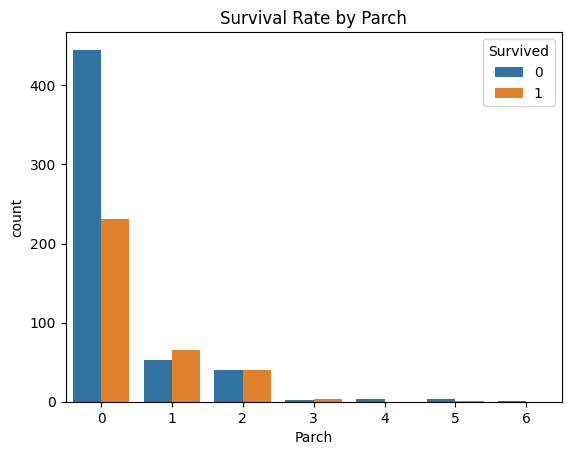

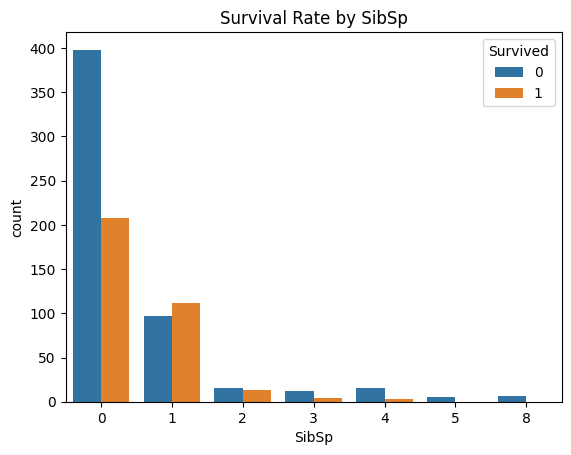

In [35]:
# Survival Rate by Sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival Rate by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival Rate by Embarked
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.show()

# Survival Rate by Parch
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title('Survival Rate by Parch')
plt.show()

# Survival Rate by SibSp
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Survival Rate by SibSp')
plt.show()